Antes de usar nltk, si se genera un error de certificado al descargar archivos
bash '/Applications/Python 3.11/Install Certificates.command' en linux/mac

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from keras.models import Sequential
import numpy as np
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import SimpleRNN, Dense, Input, LSTM, GRU, Embedding, Attention, Flatten
from keras.models import Model
import pandas as pd
import string
import datetime
import tensorflow as tf

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

Import the dataset "datase/dataset_elpino.csv"

In [48]:
dataset = pd.read_csv("dataset/dataset_elpino.csv", sep=";")

In [6]:
sexmap = {'Hombre': 1, 'Mujer': 0}

In [8]:
dataset

,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 24 Secundario (cod+des),Proced 25 Secundario (cod+des),Proced 26 Secundario (cod+des),Proced 27 Secundario (cod+des),Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada,...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Úlcera de decúbito y area de presión n...,L08.9 - Infección local de la piel y del tejid...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - Piotórax sin fístula,...,99.84 - AISLAMIENTO,88.72 - ECOCARDIOGRAFIA,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA,40,Hombre,184103 - MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado",J12.8 - Neumonía debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tip...",J94.2 - Hemotórax,J92.9 - Paquipleuritis sin asbestosis,...,91.62 - EXAMEN MICROSCOPICO PIEL.CULTIVO,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTI...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,96.59 - IRRIGACION HERIDA OTRA,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIOR...,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico,R57.1 - Choque hipovolémico,J80 - Síndrome de dificultad respiratoria del ...,Y95 - Afección nosocomial,J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,B95.6 - Staphylococcus aureus como causa de en...,B96.8 - Otros agentes bacterianos especificado...,B37.1 - Candidiasis pulmonar,...,99.84 - AISLAMIENTO,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA....,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y S...,99.26 - INYECCION TRANQUILIZANTE,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRURG...,89.66 - GASOMETRIA VENA,89.65 - GASOMETRIA ARTERIA,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo,"N18.5 - Enfermedad renal crónica, estadio 5",D64.9 - Anemia de tipo no especificado,E87.5 - Hiperpotasemia,E87.2 - Acidosis,J81 - Edema pulmonar,N17.8 - Otras insuficiencias renales agudas,J44.9 - Enfermedad pulmonar obstructiva crónic...,R41.0 - Desorientación no especificada,...,57.94 - SONDAJE URINARIO PERMANENTE,00.13 - INYECCION NESIRITIDE,00.17 - INFUSON AGENTE VASOPRESOR,99.04 - TRANSFUSION CONCENTRADO HEMATIES,99.18 - INYECCION ELECTROLITO,99.21 - INYECCION ANTIBIOTICO,99.23 - INYECCION ESTEROIDE,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis, ...",S31.1 - Herida de la pared abdominal,S36.80 - Traumatismo de otros órganos intraabd...,W31.62 - Contacto traumático con otras maquina...,"J96.09 - Insuficiencia respiratoria aguda, Tip...",J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,"U07.1 - COVID-19, virus identificado","N39.0 - Infección de vías urinarias, sitio no ...",...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,93.

In [50]:
# Preprocessing
# Add a new column with the two first digits of each value of the GRD column
dataset['CLASS'] = dataset['GRD'].astype(str).str[:2]



In [12]:
dataset.columns

Index(['Diag 01 Principal (cod+des)', 'Diag 02 Secundario (cod+des)',
       'Diag 03 Secundario (cod+des)', 'Diag 04 Secundario (cod+des)',
       'Diag 05 Secundario (cod+des)', 'Diag 06 Secundario (cod+des)',
       'Diag 07 Secundario (cod+des)', 'Diag 08 Secundario (cod+des)',
       'Diag 09 Secundario (cod+des)', 'Diag 10 Secundario (cod+des)',
       'Diag 11 Secundario (cod+des)', 'Diag 12 Secundario (cod+des)',
       'Diag 13 Secundario (cod+des)', 'Diag 14 Secundario (cod+des)',
       'Diag 15 Secundario (cod+des)', 'Diag 16 Secundario (cod+des)',
       'Diag 17 Secundario (cod+des)', 'Diag 18 Secundario (cod+des)',
       'Diag 19 Secundario (cod+des)', 'Diag 20 Secundario (cod+des)',
       'Diag 21 Secundario (cod+des)', 'Diag 22 Secundario (cod+des)',
       'Diag 23 Secundario (cod+des)', 'Diag 24 Secundario (cod+des)',
       'Diag 25 Secundario (cod+des)', 'Diag 26 Secundario (cod+des)',
       'Diag 27 Secundario (cod+des)', 'Diag 28 Secundario (cod+des)',
       

In [51]:
import re
# Update column names from dataset which start with the 'Diag' prefix and replace with 'D'
dataset.columns = [re.sub(r'^Diag ', 'D', col) for col in dataset.columns]
dataset.columns = [re.sub(r'^Proced ', 'P', col) for col in dataset.columns]
dataset.rename(columns={'Edad en años': 'Age'}, inplace=True)
dataset.rename(columns={'Sexo (Desc)': 'Sex'}, inplace=True)
dataset.columns = [re.sub(r' .+$', '', col) for col in dataset.columns]

# dataset.columns.rename(lambda x: x.substitute('Diag', '') if x.startsWith('Diag') else x, inplace=False)

dataset.columns


Index(['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10',
       'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20',
       'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30',
       'D31', 'D32', 'D33', 'D34', 'D35', 'P01', 'P02', 'P03', 'P04', 'P05',
       'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'Age', 'Sex', 'GRD', 'CLASS'],
      dtype='object')

In [55]:
# write the dataset to a new csv file
dataset.to_csv("dataset/dataset_elpino_clean.csv", sep=";", index=False)

                                                 D01  \
0            A41.8 - Otras septicemias especificadas   
1               U07.1 - COVID-19, virus identificado   
2  K56.5 - Adherencias [bridas] intestinales con ...   
3  K76.8 - Otras enfermedades especificadas del h...   
4  T81.0 - Hemorragia y hematoma que complican un...   

                                                 D02  \
0     B37.6 - Endocarditis debida a candida (I39.8*)   
1              J12.8 - Neumonía debida a otros virus   
2                              R57.2 - Shock séptico   
3                              K66.1 - Hemoperitoneo   
4  Y83.2 - Operación quirúrgica con anastomosis, ...   

                                                 D03  \
0  I39.8 - Endocarditis, válvula no especificada,...   
1                                     R06.0 - Disnea   
2                        R57.1 - Choque hipovolémico   
3        N18.5 - Enfermedad renal crónica, estadio 5   
4               S31.1 - Herida de la pared abd

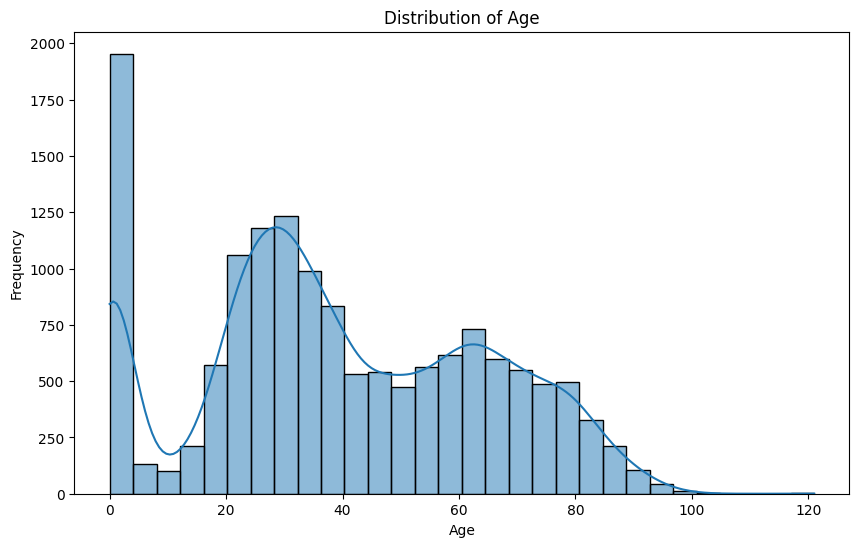

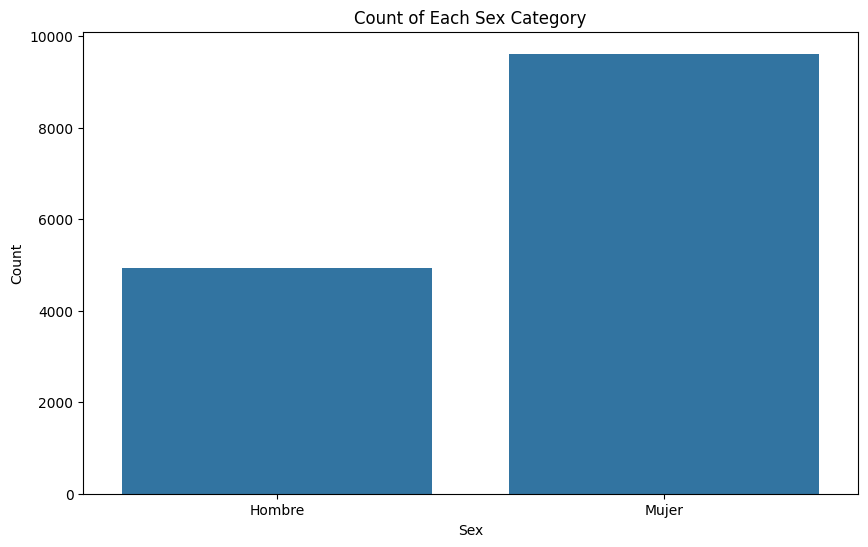

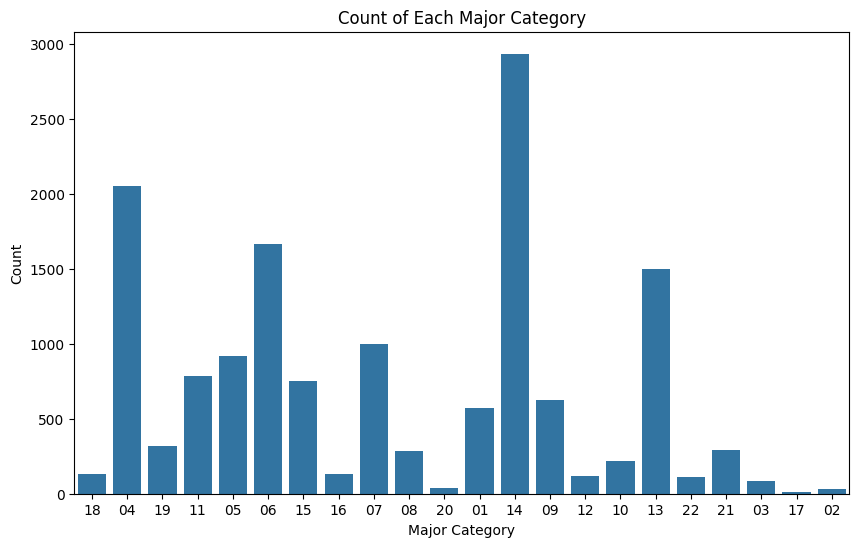

,CLASS,Count
0,14,2934
1,04,2049
2,06,1668
3,13,1497
4,07,996
5,05,917
6,11,782
7,15,753
8,09,622
9,01,573


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(dataset.head())

# Display the summary statistics of the dataset
print(dataset.describe(include='all'))

# Check for missing values in the dataset
print(dataset.isnull().sum())

# Display the data types of each column
print(dataset.dtypes)

# Plot the distribution of the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the count of each category in the 'Sex' column with correct labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=dataset)
plt.title('Count of Each Sex Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=[key for key, value in sexmap.items()])
plt.show()

# Plot the count of each category in the 'MajorCategory' column
# Plot the count of each category in the 'MajorCategory' column
plt.figure(figsize=(10, 6))
sns.countplot(x='CLASS', data=dataset)
plt.title('Count of Each Major Category')
plt.xlabel('Major Category')
plt.ylabel('Count')
plt.show()

# Create a table with the count of occurrences by MajorCategory
major_category_counts = dataset['CLASS'].value_counts().reset_index()
major_category_counts.columns = ['CLASS', 'Count']
major_category_counts
